In [167]:
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl
import matplotlib.pyplot as plt

# change the following to %matplotlib notebook for interactive plotting
%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 6))
mpl.rc('image', cmap='gray')
import cv2
import trackpy as tp
from matplotlib import cm

from scipy.fftpack import fft
from timeit import default_timer as timer
from math import sqrt



In [168]:
pixel=7
micron=33.7
mpp=micron/pixel
mpp


4.814285714285715

In [169]:
import numpy as np
np.version.version

'1.15.0'

In [170]:
from skimage import data

In [171]:
import cv2
print(cv2.__version__)

3.4.0


In [172]:

from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray


In [173]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience

import pims



In [174]:
#image = frames[100*10]
#image_gray = rgb2gray(image)
#start = timer()
#blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=.01)
#end = timer()
#y=blobs_doh[:,0]
#x=blobs_doh[:,1]
#r=blobs_doh[:,2]
#plt.scatter(x,y,alpha=0.2,s=100)
#plt.imshow(image)

In [175]:
24*120

2880

In [176]:
# get the frame number of video
cap = cv2.VideoCapture("20d_exp20.5hz04.avi")
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print( length )

4467


In [177]:
frames=pims.Video('20d_exp20.5hz04.avi')
# first three minutues
#frames=frames[9300:9300+18000]

Frame([[[ 81,  81,  81],
        [ 83,  83,  83],
        [ 86,  86,  86],
        ...,
        [125, 125, 125],
        [122, 122, 122],
        [119, 119, 119]],

       [[ 85,  85,  85],
        [ 83,  83,  83],
        [ 86,  86,  86],
        ...,
        [121, 121, 121],
        [119, 119, 119],
        [122, 122, 122]],

       [[ 81,  81,  81],
        [ 89,  89,  89],
        [ 86,  86,  86],
        ...,
        [121, 121, 121],
        [121, 121, 121],
        [122, 122, 122]],

       ...,

       [[ 57,  57,  57],
        [ 57,  57,  57],
        [ 56,  56,  56],
        ...,
        [ 96,  96,  96],
        [ 95,  95,  95],
        [ 92,  92,  92]],

       [[ 53,  53,  53],
        [ 53,  53,  53],
        [ 52,  52,  52],
        ...,
        [ 95,  95,  95],
        [ 93,  93,  93],
        [ 90,  90,  90]],

       [[ 57,  57,  57],
        [ 57,  57,  57],
        [ 52,  52,  52],
        ...,
        [ 91,  91,  91],
        [ 90,  90,  90],
        [ 89,  89,  89]]], dtype=uint8)
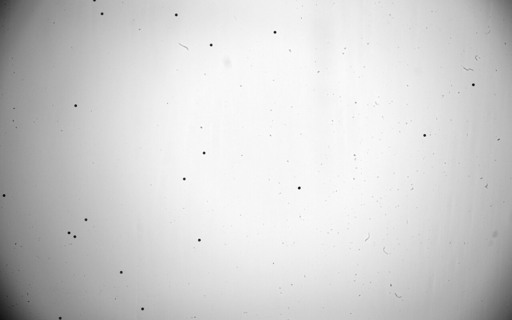

In [178]:
frames[1]

In [179]:
frames=frames[:2880]
w,l,_=frames[1].shape

In [180]:
frames=frames[::2]

Frame([[[ 80,  80,  80],
        [ 83,  83,  83],
        [ 86,  86,  86],
        ...,
        [122, 122, 122],
        [121, 121, 121],
        [121, 121, 121]],

       [[ 85,  85,  85],
        [ 80,  80,  80],
        [ 86,  86,  86],
        ...,
        [122, 122, 122],
        [118, 118, 118],
        [122, 122, 122]],

       [[ 86,  86,  86],
        [ 83,  83,  83],
        [ 82,  82,  82],
        ...,
        [124, 124, 124],
        [121, 121, 121],
        [122, 122, 122]],

       ...,

       [[ 57,  57,  57],
        [ 57,  57,  57],
        [ 57,  57,  57],
        ...,
        [ 96,  96,  96],
        [ 98,  98,  98],
        [ 95,  95,  95]],

       [[ 57,  57,  57],
        [ 52,  52,  52],
        [ 52,  52,  52],
        ...,
        [ 95,  95,  95],
        [ 93,  93,  93],
        [ 93,  93,  93]],

       [[ 59,  59,  59],
        [ 52,  52,  52],
        [ 57,  57,  57],
        ...,
        [ 95,  95,  95],
        [ 90,  90,  90],
        [ 93,  93,  93]]], dtype=uint8)
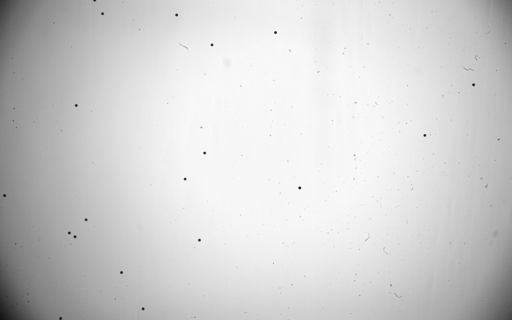

In [181]:
frames[2]

In [182]:
new_frame=np.zeros((len(frames),w, l))

In [183]:
for i in range(len(frames)-1):
    new_frame[i]=cv2.cvtColor(frames[i], cv2.COLOR_BGR2GRAY)
    if i%200==0:
        print(i)

0
200
400
600
800
1000
1200
1400


In [184]:
start = timer()
f = tp.locate(new_frame[100],19, invert=True,minmass=2000)
end = timer()
print(end - start)

0.17223553406074643


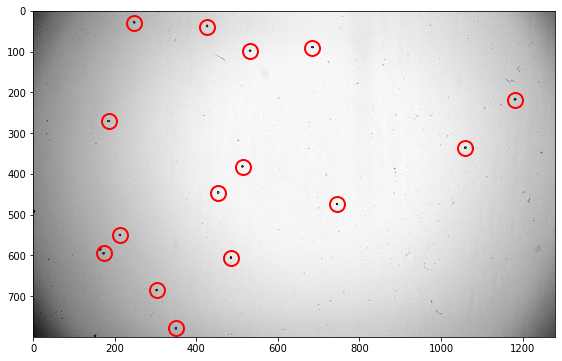

In [185]:
plt.figure()  # make a new figure
tp.annotate(f, new_frame[100]);

In [186]:
f.head()

,y,x,mass,size,ecc,signal,raw_mass,ep
68,30.008622,247.788566,3037.186696,2.488963,0.034984,104.180912,-41212.0,0.154384
108,38.478751,426.638850,3683.905362,2.612631,0.036145,114.997509,-46982.0,0.307228
346,90.444066,684.570736,4345.994983,2.625997,0.041380,133.784231,-52054.0,2.368000
389,99.038665,531.611214,3990.185858,2.549776,0.038854,126.952696,-51301.0,1.186475
865,218.059434,1181.637376,3783.531917,2.585958,0.032518,113.289626,-44590.0,0.217827


(array([2., 4., 0., 0., 2., 4., 1., 1., 0., 1.]),
 array([2873.22985068, 3067.13159174, 3261.0333328 , 3454.93507386,
        3648.83681493, 3842.73855599, 4036.64029705, 4230.54203811,
        4424.44377917, 4618.34552024, 4812.2472613 ]),
 <a list of 10 Patch objects>)

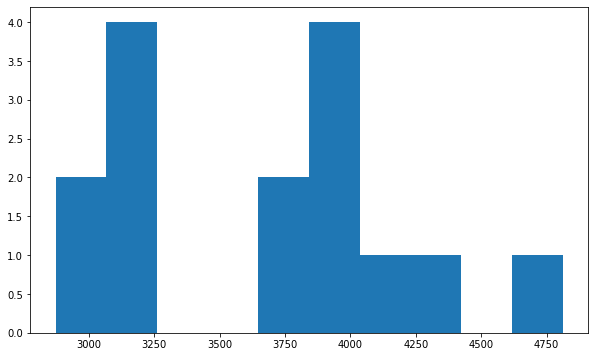

In [187]:
plt.hist(f['mass'])

In [188]:
f = tp.batch( new_frame, 19, invert=True,minmass=2000);

Frame 1439: 0 features


In [189]:
t = tp.link_df(f,10, memory=5)

In [190]:
t_ref = tp.filter_stubs(t, 150)
# Compare the number of particles in the unfiltered and filtered data.
print('Before:', t_ref['particle'].nunique())
print('After:', t_ref['particle'].nunique())

Before: 15
After: 15


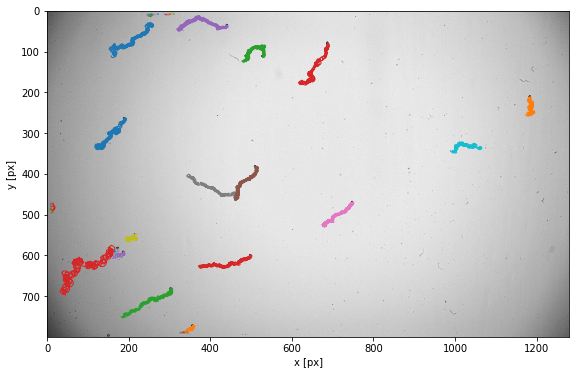

In [191]:
plt.figure()
tp.plot_traj(t,superimpose=frames[1],colorby ='particle');

In [192]:
t.to_csv('20dexp2_03.csv')

In [38]:
help(tp.plot_traj)

Help on function plot_traj in module trackpy.plots:

plot_traj(traj, colorby='particle', mpp=None, label=False, superimpose=None, cmap=None, ax=None, t_column=None, pos_columns=None, plot_style={}, **kwargs)
    Plot traces of trajectories for each particle.
    Optionally superimpose it on a frame from the video.
    
    Parameters
    ----------
    traj : DataFrame
        The DataFrame should include time and spatial coordinate columns.
    colorby : {'particle', 'frame'}, optional
    mpp : float, optional
        Microns per pixel. If omitted, the labels will have units of pixels.
    label : boolean, optional
        Set to True to write particle ID numbers next to trajectories.
    superimpose : ndarray, optional
        Background image, default None
    cmap : colormap, optional
        This is only used in colorby='frame' mode. Default = mpl.cm.winter
    ax : matplotlib axes object, optional
        Defaults to current axes
    t_column : string, optional
        DataFrame

In [121]:
t.to_csv("20degree.csv",encoding='utf-8')

In [85]:
set(t_ref['particle'])

{4,
 9,
 12,
 14,
 17,
 19,
 20,
 21,
 25,
 31,
 36,
 38,
 40,
 42,
 48,
 51,
 52,
 53,
 56,
 58,
 59,
 60,
 61,
 249,
 1155}

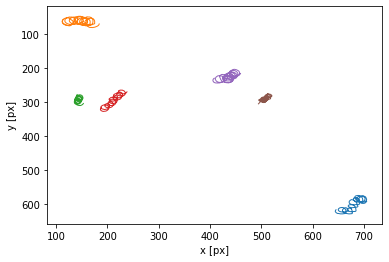

In [146]:
#t_L1=t1
plt.figure()
tp.plot_traj(t_50hz);

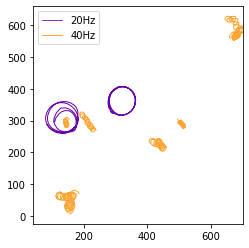

In [163]:
fig, ax = plt.subplots()

for i in list(set(t_20hz["particle"])):
    t_20_1=t_20hz[t_20hz["particle"]==i]
    plt.plot(t_20_1['x'],t_20_1['y'],linewidth=1,c=cm.plasma(0.2))
plt.plot(t_20_1['x'],t_20_1['y'],linewidth=0.8,c=cm.plasma(0.2),label="20Hz")
for i in list(set(t_40hz["particle"])):
    t_40_1=t_40hz[t_40hz["particle"]==i]
    plt.plot(t_40_1['x'],t_40_1['y'],linewidth=1,c=cm.plasma(0.8))
plt.plot(t_40_1['x'],t_40_1['y'],linewidth=1,c=cm.plasma(0.8),label="40Hz")
for i in list(set(t_50hz["particle"])):
    t_50_1=t_50hz[t_50hz["particle"]==i]
    plt.plot(t_50_1['x'],t_50_1['y'],linewidth=1,c=cm.plasma(0.8))
plt.xlim(40,700)
plt.legend(loc="best")
ax.set_aspect('equal')

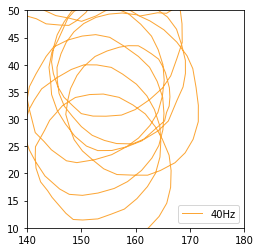

In [176]:
fig, ax = plt.subplots()
for i in list(set(t_40hz["particle"])):
    t_40_1=t_40hz[t_40hz["particle"]==i]
    plt.plot(t_40_1['x'],t_40_1['y'],linewidth=1,c=cm.plasma(0.8))
plt.plot(t_40_1['x'],t_40_1['y'],linewidth=1,c=cm.plasma(0.8),label="40Hz")
for i in list(set(t_50hz["particle"])):
    t_50_1=t_50hz[t_50hz["particle"]==i]
    plt.plot(t_50_1['x'],t_50_1['y'],linewidth=1,c=cm.plasma(0.8))
plt.xlim(140,180)
plt.ylim(10,50)
plt.legend(loc="best")
ax.set_aspect('equal')

In [143]:
t1=t_40hz
l=list(set(np.sort(t1['particle'].values)))
for i, value in enumerate(l):
    posi=t1.loc[t1['particle'] == int(value)][['x','y']]
    if (np.linalg.norm((posi.iloc[1]-posi.iloc[0]).values))<2:
        t1 = t1[t1.particle!=int(value) ]
t_40hz=t1

In [184]:
len(set(t_ref['particle'].values))

14

In [56]:
#t_3L1['particle'].replace(1, 27,inplace=True)

In [157]:
t_ref.to_csv("2.4fps7.5degre3.csv",encoding='utf-8')


In [58]:
t1=t_ref
posi=t1.loc[t1['particle'] == int(2)][['x','y']]
np.linalg.norm((posi.iloc[1]-posi.iloc[0]).values)

7.557966013171616

In [151]:
# delete particle is not moving
t1=t_ref
l=list(set(np.sort(t1['particle'].values)))
for i, value in enumerate(l):
    posi=t1.loc[t1['particle'] == int(value)][['x','y']]
    if (np.linalg.norm((posi.iloc[1]-posi.iloc[0]).values))<1:
        t1 = t1[t1.particle!=int(value) ]
t_ref=t1

In [5]:
import pandas as pd

In [522]:
t_reference=pd.read_csv('reference_horinontal.csv')
t_L1=pd.read_csv('Lleft01.csv')
t_L2=pd.read_csv('Lleft02.csv')
t_3L1=pd.read_csv('3Lleft01.csv')
t_3L2=pd.read_csv('3Lleft02.csv')

In [122]:
t_0=pd.read_csv('0degree.csv')
t_5=pd.read_csv('5degree.csv')
t_10=pd.read_csv('10degree.csv')
t_20=pd.read_csv('20degree.csv')

Drawing multicolor lines takes awhile. Come back in a minute.


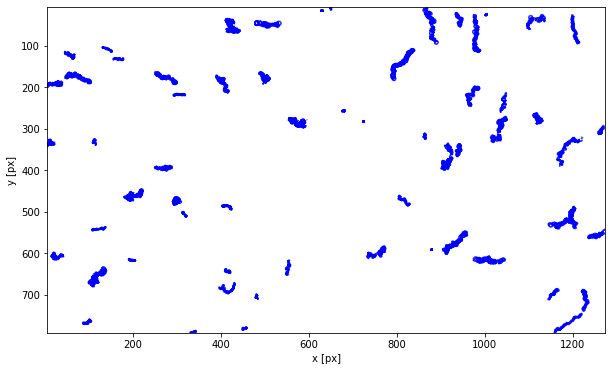

In [134]:
tp.plot_traj(t_0,);


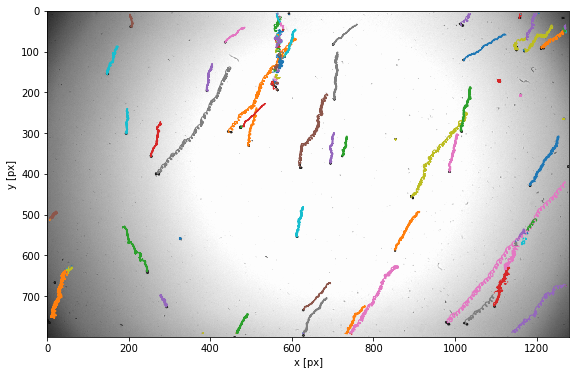

In [152]:
tp.plot_traj(t_10,superimpose=frames[1]);

In [132]:
help(tp.plot_traj, plot_style={})

Help on function plot_traj in module trackpy.plots:

plot_traj(traj, colorby='particle', mpp=None, label=False, superimpose=None, cmap=None, ax=None, t_column=None, pos_columns=None, plot_style={}, **kwargs)
    Plot traces of trajectories for each particle.
    Optionally superimpose it on a frame from the video.
    
    Parameters
    ----------
    traj : DataFrame
        The DataFrame should include time and spatial coordinate columns.
    colorby : {'particle', 'frame'}, optional
    mpp : float, optional
        Microns per pixel. If omitted, the labels will have units of pixels.
    label : boolean, optional
        Set to True to write particle ID numbers next to trajectories.
    superimpose : ndarray, optional
        Background image, default None
    cmap : colormap, optional
        This is only used in colorby='frame' mode. Default = mpl.cm.winter
    ax : matplotlib axes object, optional
        Defaults to current axes
    t_column : string, optional
        DataFrame

In [531]:
def velocity(input):
    t1=input
    fps=2
    scale=0.87
    velocity_me=[]
    for i in set(t1['particle'].values):

        net=np.linalg.norm(np.diff(t1.loc[t1['particle']==i][['x','y']].values,axis=0),axis=1)* fps*scale
        net2=[np.sum(net[:j])/fps for j in range(1,len(net))]
        #realframes=np.argmax(np.gradient(net2, 2)<0.09)
        #if  realframes==0:
           # realframes=t1['frame'].max()
        realframes=t1['frame'].max()
        distance=net2[-1]
        velocity_me.append(distance/((realframes+1)/fps))
    return [net,net2, velocity_me]

array([[483.01293019, 482.95445216, 483.62708436, ..., 447.90756657,
        447.73061682, 447.58415671],
       [424.42522124, 416.55810771, 408.42550567, ..., 555.66287496,
        547.71691937, 539.53294957]])

(0, 0.4)

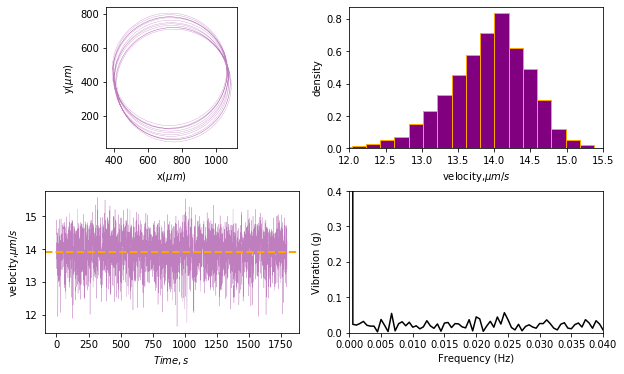

In [655]:
plt.figure()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
ax1=plt.subplot(221)
plt.plot(t_reference[['x']].values*scale,t_reference[['y']].values*scale,color='purple',alpha=0.5,linewidth=0.3)
plt.xlabel("x($\mu m$) ")
plt.ylabel("y($\mu m$) ")
ax1.set_aspect(1)

ax2=plt.subplot(222)
plt.hist(velocity(t_reference)[0],20, density=True, facecolor='purple',edgecolor='orange', alpha=1)
plt.xlabel("velocity,$\mu m/s$ ")
plt.ylabel("density")
plt.xlim(12,15.5)

ax3=plt.subplot(223)
plt.plot(np.arange(3600)/2,velocity(t_reference)[0],color='purple',alpha=0.5,linewidth=0.3)
plt.axhline(y=velocity(t_reference)[2], linewidth=2, color="orange",linestyle='dashed')
plt.xlabel("$Time,s$")
plt.ylabel("velocity,$\mu m/s$ ")
#plt.xlim(12,15.5)

N=len(velocity(t_reference)[0])
sampling_rate =2
T = 1/sampling_rate 
x = np.linspace(0.0, 1.0/(2.0*T), int(N/2))
yr = fft( velocity(t_reference)[0]) # "raw" FFT with both + and - frequencies
y = 2/N * np.abs(yr[0:np.int(N/2)]) # positive freqs only


ax3=plt.subplot(224)
plt.plot(x, y,color='black')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Vibration (g)')
plt.xlim(0,0.04)
plt.ylim(0,0.4)

#plt.xlim(12,15.5)


(0, 0.4)

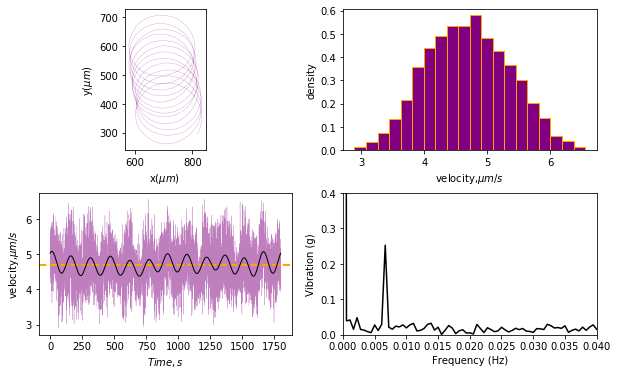

In [704]:
plt.figure()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
ax1=plt.subplot(221)
plt.plot(t_L1[['x']].values*scale,t_L1[['y']].values*scale,color='purple',alpha=0.5,linewidth=0.3)
plt.xlabel("x($\mu m$) ")
plt.ylabel("y($\mu m$) ")
ax1.set_aspect(1)

ax2=plt.subplot(222)
plt.hist(velocity(t_L1)[0],20, density=True, facecolor='purple',edgecolor='orange', alpha=1)
plt.xlabel("velocity,$\mu m/s$ ")
plt.ylabel("density")
#plt.xlim(12,15.5)

rft = np.fft.rfft(velocity(t_L1)[0])
rft[15:] = 0   # Note, rft.shape = 21
y_smooth = np.fft.irfft(rft)


####
ax3=plt.subplot(223)
plt.plot(np.arange(3600)/2,velocity(t_L1)[0],color='purple',alpha=0.5,linewidth=0.3)
plt.axhline(y=velocity(t_L1)[2], linewidth=2, color="orange",linestyle='dashed')
plt.plot( np.arange(3600)/2,y_smooth, label='Smoothed',color='black',alpha=1,linewidth=1)
plt.xlabel("$Time,s$")
plt.ylabel("velocity,$\mu m/s$ ")
#plt.xlim(12,15.5)

N=len(velocity(t_reference)[0])
sampling_rate =2
T = 1/sampling_rate 
x = np.linspace(0.0, 1.0/(2.0*T), int(N/2))
yr = fft( velocity(t_L1)[0]) # "raw" FFT with both + and - frequencies
y = 2/N * np.abs(yr[0:np.int(N/2)]) # positive freqs only


ax3=plt.subplot(224)
plt.plot(x, y,color='black')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Vibration (g)')
plt.xlim(0,0.04)
plt.ylim(0,0.4)

#plt.xlim(12,15.5)



(0, 0.4)

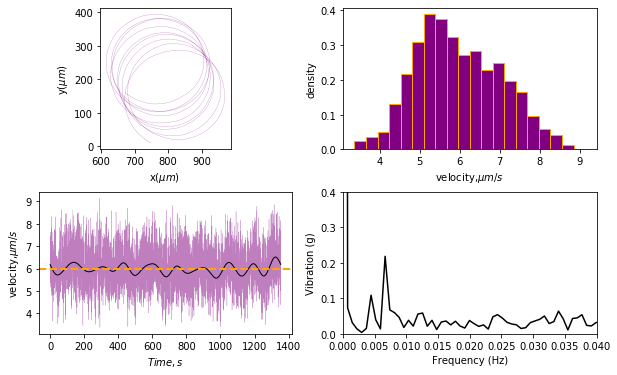

In [715]:
plt.figure()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
ax1=plt.subplot(221)
plt.plot(t_3L2[['x']].values*scale,t_3L2[['y']].values*scale,color='purple',alpha=0.5,linewidth=0.3)
plt.xlabel("x($\mu m$) ")
plt.ylabel("y($\mu m$) ")
ax1.set_aspect(1)

ax2=plt.subplot(222)
plt.hist(velocity(t_3L2)[0],20, density=True, facecolor='purple',edgecolor='orange', alpha=1)
plt.xlabel("velocity,$\mu m/s$ ")
plt.ylabel("density")
#plt.xlim(12,15.5)
rft = np.fft.rfft(velocity(t_3L2)[0])
rft[15:] = 0   # Note, rft.shape = 21
y_smooth = np.fft.irfft(rft)
###
ax3=plt.subplot(223)
plt.plot(np.arange(2708)/2,velocity(t_3L2)[0],color='purple',alpha=0.5,linewidth=0.3)
plt.plot( np.arange(2708)/2,y_smooth, label='Smoothed',color='black',alpha=1,linewidth=1)
plt.axhline(y=velocity(t_3L2)[2], linewidth=2, color="orange",linestyle='dashed')
plt.xlabel("$Time,s$")
plt.ylabel("velocity,$\mu m/s$ ")
#plt.xlim(12,15.5)

N=len(velocity(t_3L2)[0])
sampling_rate =2
T = 1/sampling_rate 
x = np.linspace(0.0, 1.0/(2.0*T), int(N/2))
yr = fft( velocity(t_3L2)[0]) # "raw" FFT with both + and - frequencies
y = 2/N * np.abs(yr[0:np.int(N/2)]) # positive freqs only


ax3=plt.subplot(224)
plt.plot(x, y,color='black')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Vibration (g)')
plt.xlim(0,0.04)
plt.ylim(0,0.4)

#plt.xlim(12,15.5)



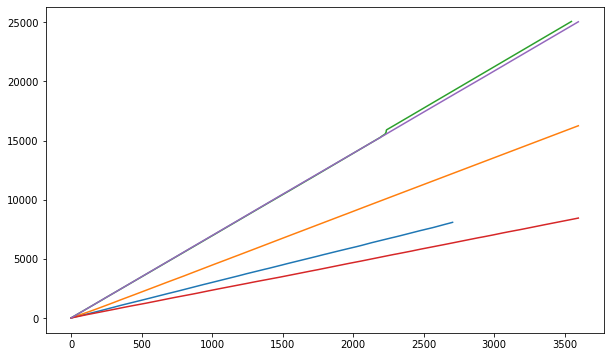

In [532]:
plt.plot(velocity(t_3L2)[1])
plt.plot(velocity(t_3L1)[1])
plt.plot(velocity(t_L2)[1])
plt.plot(velocity(t_L1)[1])
plt.plot(velocity(t_reference)[1])

(0, 2000)

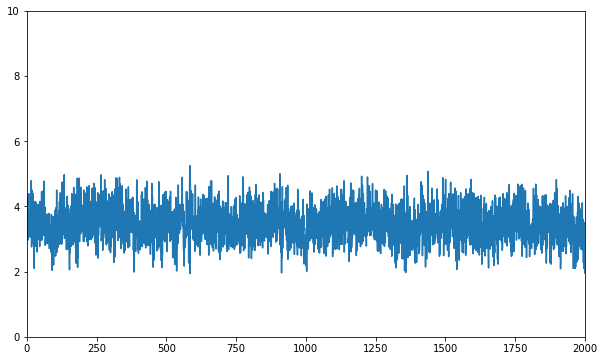

In [506]:
#plt.plot(net_reference)
#plt.plot(net)
#plt.plot(net_L2)
#plt.plot(net_3L1)
plt.plot(net_3L2)
plt.ylim(0,10)
plt.xlim(0,2000)


In [607]:
dx_dt = np.gradient(trac[:, 0])
dy_dt = np.gradient(trac[:, 1])
velocity = np.array([ [dx_dt[i], dy_dt[i]] for i in range(dx_dt.size)])

In [530]:
fps=1
scale=3600/1636
velocity_me=[]
for i in set(t1['particle'].values):
    
    net=np.linalg.norm(np.diff(t1.loc[t1['particle']==i][['x','y']].values,axis=0),axis=1)
    net2=[np.sum(net[:i]) for i in range(1,len(net))]
    #realframes=np.argmax(np.gradient(net2, 2)<0.09)
    #if  realframes==0:
       # realframes=t1['frame'].max()
    realframes=t1['frame'].max()
    distance=net2[-1]
    velocity_me.append(distance*scale/((realframes+1)/fps))

In [535]:
t1['frame'].max()

179

In [307]:
t1.to_csv('electric.csv', encoding='utf-8')

In [539]:
np.mean(velocity_me)
np.std(velocity_me)

1.914308372703426

In [541]:
np.mean(velocity_magnetic)
np.std(velocity_magnetic)

0.6854351710047306

In [542]:
np.mean(velocity_electric)
np.std(velocity_electric)

0.8325345893051683

Text(0, 0.5, 'velocity $\\mu m/s$ ')

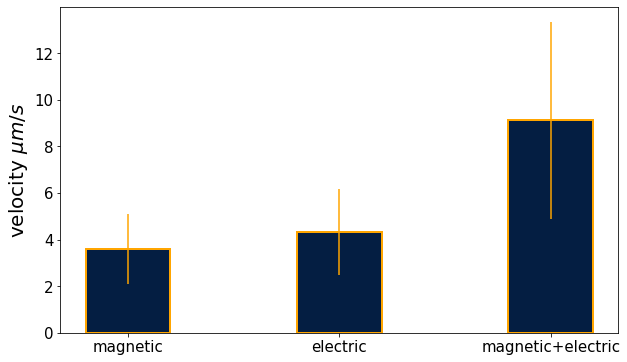

In [620]:
import matplotlib
font = {'family' : 'normal',
       # 'weight' : 'normal',
        'size'   : 15}
matplotlib.rc('font', **font)
mean=np.array([np.mean(velocity_magnetic),np.mean(velocity_electric),np.mean(velocity_me)])*(3600/1636)
std=np.array([np.std(velocity_magnetic),np.std(velocity_electric),np.std(velocity_me)])*(3600/1636)
ind = ['magnetic','electric','magnetic+electric']
width = 0.4  
plt.bar(ind, mean, width, yerr=std, color=[(4/255,30/255,66/255)],ecolor=[(255/255,165/255,0)]\
        ,edgecolor=[(255/255,165/255,0)],linewidth=2)
plt.ylabel('velocity ''$\mu m/s$'' ',fontsize=20)